In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
data=pd.read_csv('datasets_10624_14867_Salary_Data.csv')
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


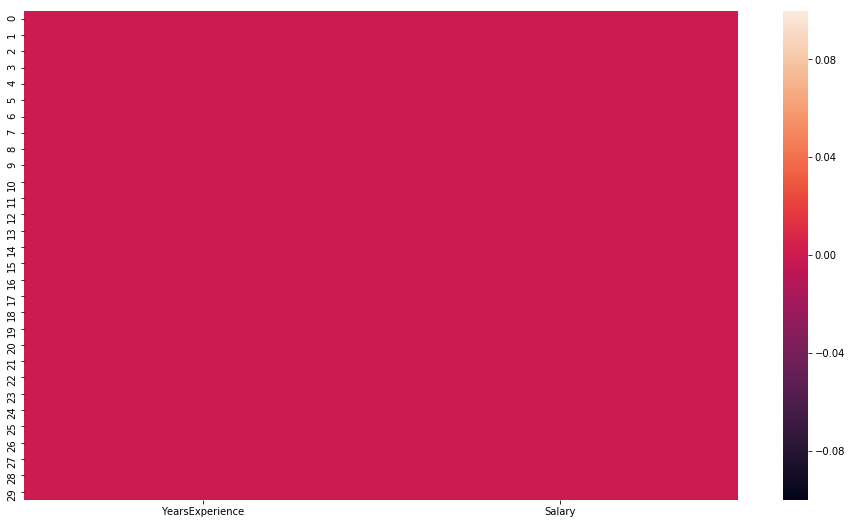

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())# This shows there is no null value

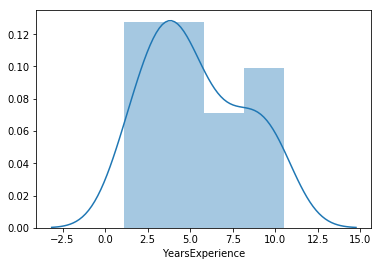

In [10]:
sns.distplot(data['YearsExperience'])

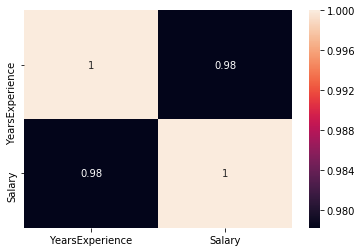

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [13]:
x=data.iloc[:,0]
y=data['Salary']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

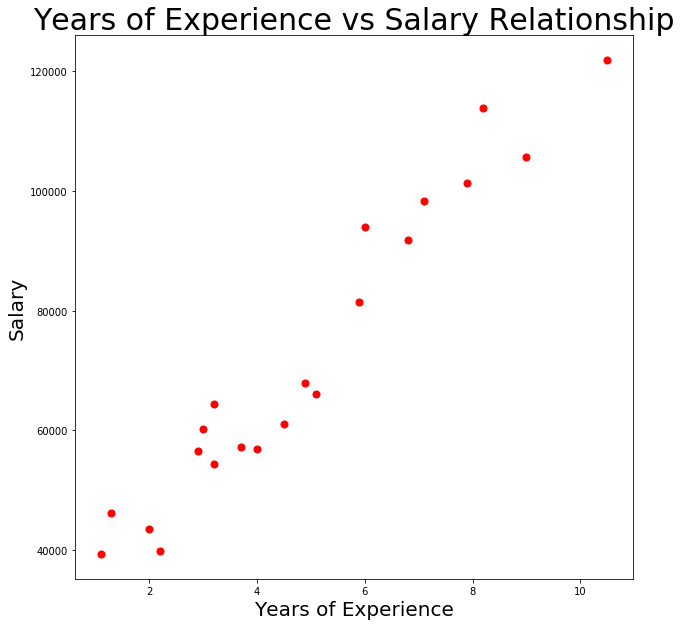

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,c='r',marker='o',s=50)
plt.title('Years of Experience vs Salary Relationship',fontsize=30)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

[Text(0.5, 1.0, 'Years of Experience vs Salary')]

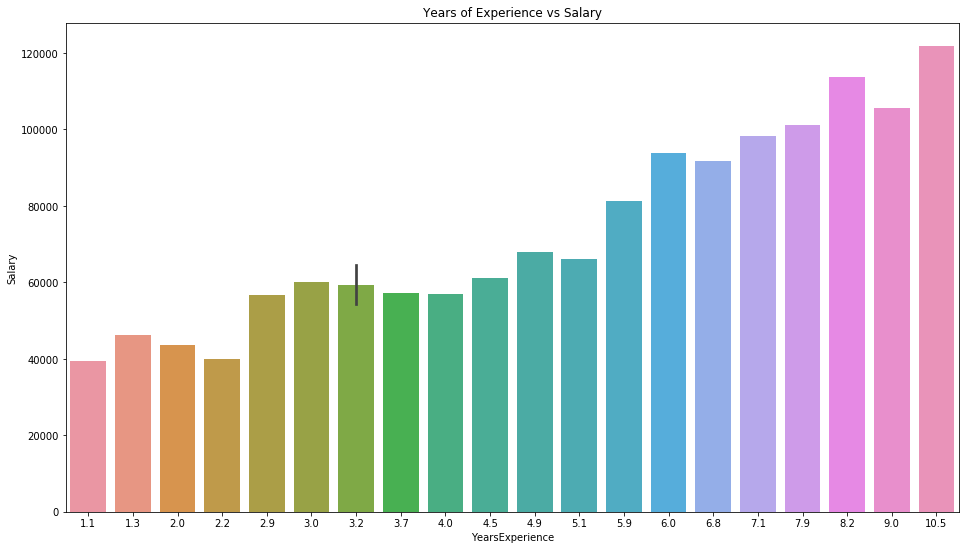

In [16]:
import seaborn as sns
plt.figure(figsize=(16,9))
ax=sns.barplot(x_train,y_train)
ax.set(title='Years of Experience vs Salary')



In [17]:
x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
print(x_mean,'',y_mean)

4.880952380952381  72464.38095238095


In [18]:
n=len(x_train)
s_yx=np.sum(x_train*y_train)-n*x_mean*y_mean
s_xx=np.sum(x_train*x_train)-n*(x_mean)**2
print(s_yx,'',s_xx)

1288462.2523809504  137.6523809523809


In [19]:
b1=s_yx/s_xx
bo=y_mean-b1*x_mean
print("Coeffients: ",b1)
print("Intercept: ",bo)

Coeffients:  9360.261286193645
Intercept:  26777.391341197676


In [20]:
y_pred=bo+b1*x_train


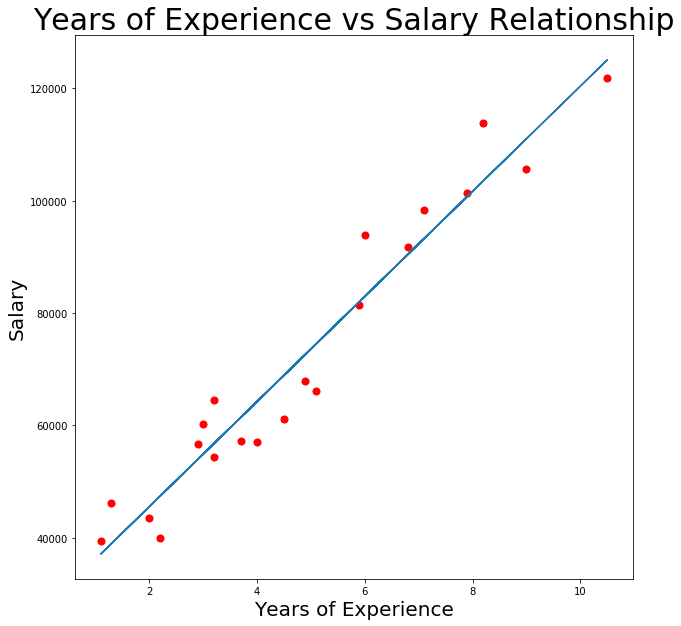

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,c='r',marker='o',s=50)
plt.plot(x_train,y_pred)
plt.title('Years of Experience vs Salary Relationship',fontsize=30)
plt.xlabel('Years of Experience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

In [22]:
y_test_pred=bo+b1*x_test

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE= " ,mean_squared_error(y_test,y_test_pred))
print("R2_score: ",r2_score(y_test,y_test_pred))

MSE=  23370078.80083303
R2_score:  0.974099340721351


Text(0, 0.5, 'Residues')

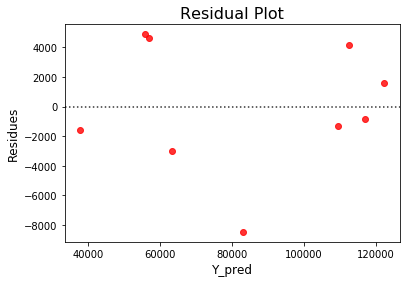

In [24]:
plt.title('Residual Plot',size=16)
sns.residplot(y_test,y_test_pred,color='r')
plt.xlabel('Y_pred',size=12)
plt.ylabel('Residues',size=12)